# A Backwards Approach to Pandas

### The Hacker Within, Berkeley Feb 10 2016
### Tenzing Joshi -- Applied Nuclear Physics, LBL


This notebook is an introduction to the pandas library for python.  We'll go over the data structures of pandas and explore some of their uses.  We'll then play around with some data from a mobile gamma-ray detector array to look at some real uses of DataFrames.


## Resources

* Pandas site
  * http://pandas.pydata.org/pandas-docs/stable/overview.html
  * There are loads of useful examples and tutorials on this site
  * If you're curious then take some time to look around
  
* Wes's Book
  * Wes McKinney started Pandas
  * Wes wrote a book titled **Python for Data Analysis**
  * http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793
  * This was my starting point and there is great stuff in this book

* Other Pandas tutorials I found online with a 5 minute google search
  * http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/
  * http://synesthesiam.com/posts/an-introduction-to-pandas.html
  * https://plot.ly/ipython-notebooks/big-data-analytics-with-pandas-and-sqlite/

* Stack Overflow
  * There are a large number of Pandas related answers on here
  * http://stackoverflow.com/questions/tagged/pandas
  * It seems like this site is monitored for pandas tagged questions, if you're stumped then this is a great place to ask a question.
  

## What is Pandas?  

I'll just let the Pandas [website](http://pandas.pydata.org/pandas-docs/stable/overview.html) do the talking here...


> pandas consists of the following things

> - A set of labeled array data structures, the primary of which are Series and DataFrame
>   - **Series** 1D labeled homogenously typed array
>   - **DataFrame** 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
>   - **Panel** General 3D labeled, also size-mutable array
> - Index objects enabling both simple axis indexing and multi-level / hierarchical axis indexing
> - An integrated group by engine for aggregating and transforming data sets
> - Date range generation (date_range) and custom date offsets enabling the implementation of customized frequencies
> - Input/Output tools: loading tabular data from flat files (CSV, delimited, Excel 2003), and saving and loading pandas objects from the fast and efficient PyTables/HDF5 format.
> - Memory-efficient “sparse” versions of the standard data structures for storing data that is mostly missing or mostly constant (some fixed value)
> - Moving window statistics (rolling mean, rolling standard deviation, etc.)
> - Static and moving window linear and panel regression


Pandas has a truly *incredible* amount of functionality, however, accessing a lot of this requires understanding the nuance of Index objects and knowning that the functionality exists.  

In [1]:
import numpy as np
import pandas as pd

### Lets first play with Series

In [ ]:
sadstring = 'sadnap'
mfs = pd.Series(list(sadstring))
mfs

#### Series are like np.arrays, but they have indicies.  If you don't specify on creation it will initialize to range(len(object)).  Indicies are big part of what makes pandas useful, but also a bit tricky.  We'll get to using indicies in more detail in a bit.

The .values attribute will return the underlying numpy array or recarray

In [ ]:
mfs.values

The associated index can be viewed.  Theres also plenty of attributes for working with more complicated indicies.

You can also write yourself a new index.

In [ ]:
mfs.index

In [ ]:
mfs.index = range(5,11)
mfs

Grabbing a component in a Series is as easy as grabbing based on its label.

In [ ]:
mfs[5]

.ix, .iloc, and .loc can be used to slice in different ways too.  More about this in a bit. 

In [ ]:
mfs.ix[10]

In [ ]:
mfs.iloc[:3]

Passing a list of labels works as you'd expect.  The ordering of the list is preserved in the result!

In [ ]:
mfs[np.arange(5,11)[::-1]]

Adding a few items is straightforward.

In [ ]:
mfs[4] = ' '
mfs[0] = ' wants friend'

In [ ]:
mfs.loc[[5,6,7,4,10,9,8,7,6,0]].tolist()

In [ ]:
''.join(_)

#### Sad pandas are silly anyways, how about something with numbers, because pandas play nicely with math.

In [ ]:
animalsdict = {
    'moose':1220,
    'buffalo':774,
    'chicken':13,
    'sadpanda':97,
    'platypus':2084
}
mss = pd.Series(animalsdict)
mss.name = 'CoolFactor'
mss

In [ ]:
mss * 2.41

In [ ]:
mss[mss>555]

Boolean masking can work with a boolean Series or a boolean array of appropriate length. 

The .apply method can applie an arbitray function to each labeled piece.  When we get to 2D structures you can apply to rows or columns if you'd like.

In [ ]:
mss[mss>555].apply(np.random.poisson)

In [ ]:
np.min(mss)

In [ ]:
mss.describe()

#### Series are also a bit like ordered dictionaries with fixed length.

In [ ]:
'chicken' in mss

In [ ]:
3 in mss

In [ ]:
mts = pd.Series( {'chicken':1.2, 
                  'moose':30.77, 
                  'elk': 22.88, 
                  'marmot':4.49,
                  'platypus':14.9,
                  'humans':100.,
                  'sadpanda':0.9} )
mts.name = 'NormalizedRadFactor'
mts

In [ ]:
coolness = mss / mss.chicken
radness = mts

print coolness

print radness

In [ ]:
animalBitCoinValue = (radness + coolness * radness) / radness.max()
animalBitCoinValue

In [ ]:
animalBitCoinValue.isnull()

In [ ]:
prizedAnimals = animalBitCoinValue[animalBitCoinValue>17.]
print prizedAnimals

In [ ]:
animalBitCoinValue[animalBitCoinValue.isnull()] = 0.001
print animalBitCoinValue

## The Index is used for alignment, and it works when you have Indicies with multiple levels.  Also boolean masking can be sprinkled in for good measure.



A pandas DataFrame is somewhat inspired by the R Data-Frame, but apparently here at THW we don't like R... booo R.  

Anyways, DataFrames are 2D data structures, columns can be different dtypes, and columns and rows have indicies.  

## Theres more than one way to make a DataFrames (and Series).
* numpy arrays
* lists
* csv files
* excel files
* databases queries
* dicts of things
* lists of series
* other dataframes
* Seriously, it gets a bit rediculous, but in a good way once you get the hang of it.

I personally end up using np.arrays, dicts of arrays, lists of named Series, and sometimes concatenate lists of DFs. 

In [ ]:
data = {'state':['Ohio','California','Indiana','Idaho'],
        'year':[2000,2001,2002,2004],
        'pop':[23.4,34.1,7.8,1.3]}
df = pd.DataFrame(data)
df

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df['state']

In [ ]:
df.year

In [ ]:
df2 = pd.DataFrame(data, columns=['pop','state','year','debt'], index=range(1,5))
df2

In [ ]:
df2[1]

Knowing how to slice into a dataframe to get at your data takes practice.  Pandas has a lot of choices for doing this because they are needed to cover the bases of all functionality expectations.  

Seriously.  Practice... experiment... work through some tutorials/cookbooks on the web.

[Indexing options](http://pandas.pydata.org/pandas-docs/stable/indexing.html)
- df[LABEL], returns the corresponding value in a Series or a column of a dataframe with index of LABEL.
- df.LABEL, returns the corresponding value in a Series or a column of a dataframe with index of LABEL.
- Next we have df.loc[LABEL] or df.loc[LABEL1, LABEL2].  This is label based, but ca nalso take boolean masks.  Slicing can work too!  Lists of labels can work too!  
- After that we've got df.iloc[INT] and df.iloc[INT1,INT2].  This is integer location along the different axes... like referencing location in a numpy array.
- Then there is df.ix which can take mixed labels and integer locations.  Be careful with this, but I use it quite often because df.ix is shorter than df.loc.  Dumb, I know.
- df.xs() comes in pretty handy with grabbing interesting data from MultiIndex frames.  More on that later. But you can basically grab a cross-section of a dataframe based on the value of an index, and you can specify the level of that index.

In [ ]:
print df2

In [ ]:
df2.loc[1]

In [ ]:
df2.iloc[0]

In [ ]:
df2.ix[1,'state']

In [ ]:
df2['state'][0]

In [ ]:
df2.ix[0:2,'state']

In [ ]:
df2['debt'] = 22
df2

In [ ]:
df2.ix[3,'debt'] = 0.22
df2

In [ ]:
df2.fillna(321)

In [ ]:
df2.values

In [ ]:
df2.reindex(range(6), fill_value=0.1)

In [ ]:
df2

In [ ]:
df2.drop(2)

In [ ]:
df2.drop('pop', axis=1)

In [ ]:
df2[[0,1]]

In [ ]:
df2.loc[[2,4],['pop','state']] = [[11.1,'Maine'],[87,'Canada']]
print df2

#### OK, so that was a quick introduction to DataFrames and how to touch some of the data that lives inside of them.  





## QUESTIONS BEFORE WE CONTINUE?

### For this next section lets play with some data that I was working with last week.

This data comes from a mobile array of High Purity Germanium (HPGe) Detectors.  It isn't raw, but I've left it ragged enough that we'll need to munge it before answering questions becomes easier.  This isn't a terrifically complicated table for an example, but maybe thats a good thing.  Loads of the tutorials posted at the top in References have great examples too!

Please do not distribute this data, not that you would want to.  While this is part of a semi-open dataset access to this dataset should be pursued through the formal channels.

https://dl.dropboxusercontent.com/u/4558549/THWPasses.hdf5

#### Pandas has PyTables integration!  This means that you can drop your Series or DataFrames directly into an HDF5 file (called an HDFStore in Pandas lingo).  Lets open the Store of data we'll use.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [3]:
infile = pd.HDFStore('THWPasses.hdf5','r')

In [4]:
infile

<class 'pandas.io.pytables.HDFStore'>
File path: THWPasses.hdf5
/GPSdata             frame        (shape->[14371,3])  
/HPGEdata            frame        (shape->[2328352,3])

In [5]:
keys = infile.keys()
print keys

['/GPSdata', '/HPGEdata']


So we've got a few dataframes hiding inside

In [6]:
listmodedf = infile[keys[1]]
lmdf = listmodedf

gpsdf = infile[keys[0]]

#### Whats inside?

In [7]:
lmdf.head(10)

,timestamp,detch,energy
13975129,1.335387e+09,16,187.947830
13975130,1.335387e+09,7,2109.051270
13975131,1.335387e+09,6,119.749451
13975132,1.335387e+09,24,413.067627
13975133,1.335387e+09,7,242.087418
13975134,1.335387e+09,28,370.802856
13975135,1.335387e+09,28,149.982178
13975136,1.335387e+09,24,546.586487
13975137,1.335387e+09,6,115.927986
13975138,1.335387e+09,19,106.596954


In [ ]:
gpsdf.head(10)

#### Anyone have ideas of questions we could ask about the data?

#### Ok, here are a few things I did...

In [8]:
lmdf.detch.value_counts()

6     202496
27    164686
23    160142
7     159862
2     159850
5     155212
28    146047
19    145917
4     142246
26    132366
24    129493
3     129375
29    127270
16    124495
1     118354
25     95034
30     26114
22      9393
Name: detch, dtype: int64

Looks like two outliers...

In [10]:
fullhistogram = lmdf.groupby('detch').energy.apply(lambda x: np.histogram(x, bins=range(0,3000,1))[0])
fullhistogram.head()

In [ ]:
fullhistogram = fullhistogram.apply(pd.Series)

In [11]:
fullhistogram.head()

,0,1,2,3,4,5,6,7,8,9,...,2989,2990,2991,2992,2993,2994,2995,2996,2997,2998
detch,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


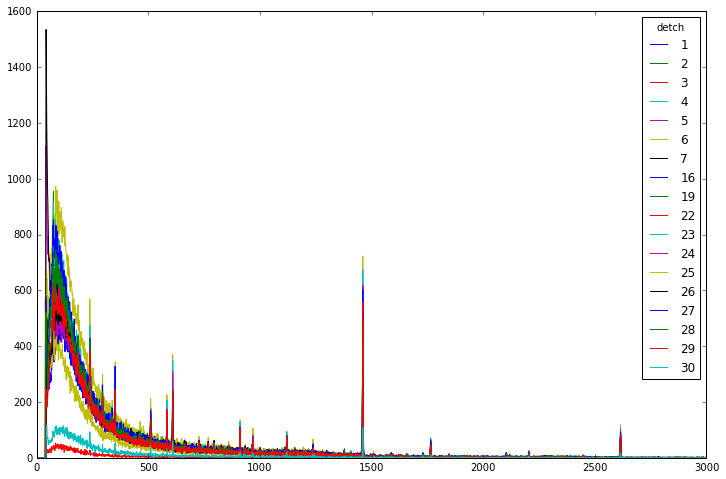

In [18]:
fullhistogram.T.plot(figsize=(12,8))

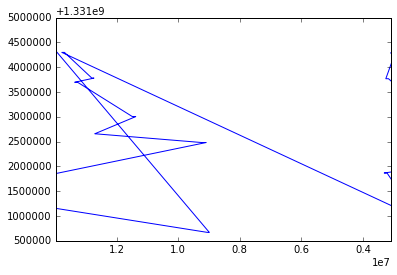

In [20]:
lmdf.timestamp.iloc[::1000].plot()

looks like the data isn't sorted in time... we should do that!

In [21]:
lmdf.sort_values(by='timestamp', inplace=True)
gpsdf.sort_values(by='timestamp', inplace=True)

In [22]:
lmdf.head()

,timestamp,detch,energy
1180438,1.331661e+09,3,143.800919
1180439,1.331661e+09,6,381.026550
1180440,1.331661e+09,4,146.409409
1180441,1.331661e+09,7,224.622955
1180442,1.331661e+09,22,467.196014


Look!  It sorted our dataframe inplace.  The inplace flag can be set for a ton of different operations, otherwise it usually returns a new object.  

One thing to note is that the index also came along for the ride, by that I mean the key value pairs are in tact.

In [23]:
lmdf.reset_index(inplace=True, drop=True)
gpsdf.reset_index(inplace=True, drop=True)

In [24]:
lmdf.head()

,timestamp,detch,energy
0,1.331661e+09,3,143.800919
1,1.331661e+09,6,381.026550
2,1.331661e+09,4,146.409409
3,1.331661e+09,7,224.622955
4,1.331661e+09,22,467.196014


Thats a bit better.  Without the drop flag the old index will get turned into a column in the returned frame.  You can also use the append flat, then the index you're adding becomes an additiona level on the index.

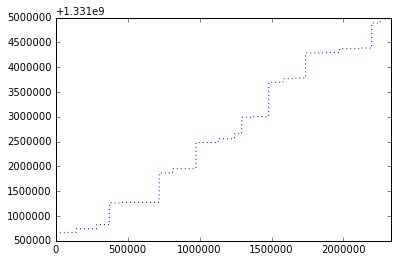

In [25]:
fig = plt.figure()
lmdf.timestamp.iloc[::1000].plot(fig=fig,ls=':')

Plotting is pretty convienent, lots of matplotlib syntax works intuitively.

Looks like there are discrete jumps in timestamp... Maybe this data was acquired across a wide period of time.  Maybe we should split up.

In [26]:
lmdf.timestamp.diff().describe()

count    2328351.000000
mean           1.854004
std          920.638557
min            0.000000
25%            0.000200
50%            0.000500
75%            0.001200
max       691704.402635
Name: timestamp, dtype: float64

In [27]:
lmdf['segment'] = (lmdf.timestamp.diff() > 60.).astype(int).cumsum()
lmdf.segment.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

Cool, we've got 22 different segments of data...  Maybe the GPS data will cooperate as well...

In [28]:
gpsdf['segment'] = (gpsdf.timestamp.diff() > 60.).astype(int)
gpsdf.segment = gpsdf.segment.cumsum()
gpsdf.segment.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

Schwing!

Maybe the GPS is well behaved when it comes to sampling frequency...

In [29]:
gpsdf.timestamp.diff().describe()

count     14370.00000
mean        300.40167
std       11715.43832
min           0.20000
25%           0.20000
50%           0.20000
75%           0.20000
max      691704.80000
Name: timestamp, dtype: float64

Maybe it makes sense to group by the segment and then look at the time between samples...

In [30]:
gpsdf.groupby('segment').apply(lambda x: x.timestamp.diff().describe())

timestamp,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
0,451,0.2,9.539386e-08,0.2,0.2,0.2,0.2,0.2
1,398,0.2,9.521650e-08,0.2,0.2,0.2,0.2,0.2
2,772,0.2,9.533642e-08,0.2,0.2,0.2,0.2,0.2
3,569,0.2,9.551419e-08,0.2,0.2,0.2,0.2,0.2
4,492,0.2,9.531866e-08,0.2,0.2,0.2,0.2,0.2
5,690,0.2,9.543661e-08,0.2,0.2,0.2,0.2,0.2
6,444,0.2,9.555555e-08,0.2,0.2,0.2,0.2,0.2
7,874,0.2,9.546295e-08,0.2,0.2,0.2,0.2,0.2
8,1172,0.2,9.534703e-08,0.2,0.2,0.2,0.2,0.2


In [31]:
gpsdf.groupby('segment').timestamp.apply(lambda x: x.diff().describe())

segment       
0        count    4.510000e+02
         mean     2.000000e-01
         std      9.539386e-08
         min      1.999998e-01
         25%      2.000000e-01
         50%      2.000000e-01
         75%      2.000000e-01
         max      2.000000e-01
1        count    3.980000e+02
         mean     2.000000e-01
         std      9.521650e-08
         min      1.999998e-01
         25%      2.000000e-01
         50%      2.000000e-01
         75%      2.000000e-01
         max      2.000000e-01
2        count    7.720000e+02
         mean     2.000000e-01
         std      9.533642e-08
         min      1.999998e-01
         25%      2.000000e-01
         50%      2.000000e-01
         75%      2.000000e-01
         max      2.000000e-01
3        count    5.690000e+02
         mean     2.000000e-01
         std      9.551419e-08
         min      1.999998e-01
         25%      2.000000e-01
         50%      2.000000e-01
                      ...     
18       std      9.5457

Five Hz across the board.  Not too shabby.

What about event rate in the gamma detectors?

In [32]:
seggroup = lmdf.groupby('segment')
countspersegment = seggroup.apply(len)

In [33]:
segtime = seggroup.timestamp.apply(lambda x: x.max()-x.min())

In [34]:
countrate = countspersegment / segtime

In [35]:
countrate

segment
0      853.772038
1      813.118296
2      918.903625
3      771.657073
4      759.539539
5     1957.996836
6     1037.104551
7      931.202490
8      657.238185
9      693.859710
10     713.826310
11     753.025399
12     706.037820
13     736.035149
14     771.529778
15     721.559409
16     634.953860
17     673.506044
18     770.018212
19     615.876206
20     711.266296
21     718.124089
dtype: float64

What if the number of detectors changes per segment!?

In [36]:
numdetperseg = seggroup.detch.apply(lambda x: len(x.unique()))
numdetperseg

segment
0     17
1     17
2     17
3     15
4     14
5     14
6     16
7     16
8     15
9     16
10    16
11    16
12    16
13    16
14    16
15    16
16    15
17    15
18    15
19    15
20    15
21    15
Name: detch, dtype: int64

In [37]:
countrate = countrate / numdetperseg
countrate

segment
0      50.221885
1      47.830488
2      54.053154
3      51.443805
4      54.252824
5     139.856917
6      64.819034
7      58.200156
8      43.815879
9      43.366232
10     44.614144
11     47.064087
12     44.127364
13     46.002197
14     48.220611
15     45.097463
16     42.330257
17     44.900403
18     51.334547
19     41.058414
20     47.417753
21     47.874939
dtype: float64

In [38]:
gpsdf.describe()

,timestamp,lat,lon,segment
count,1.437100e+04,14371.000000,14371.000000,14371.000000
mean,1.333865e+09,37.871892,-122.270444,10.768144
std,1.371669e+06,0.000321,0.002528,6.023946
min,1.331661e+09,37.871217,-122.275301,0.000000
25%,1.332867e+09,37.871629,-122.272753,6.000000
50%,1.333991e+09,37.871929,-122.270357,11.000000
75%,1.335287e+09,37.872153,-122.268158,16.000000
max,1.335978e+09,37.872481,-122.266184,21.000000


Looks like there isn't much variance in the GPS positions.  Lets convert to meters in cartesian space to have a look!

In [39]:
# in meters
R_earth = 6371000
degtoster = np.pi/180.

def haversine(lat1deg, lon1deg, lat2deg, lon2deg):
	"""
	Calculate the great circle distance between two points in meters
	and the bearing direction on the earth (specified in decimal degrees)
	"""
	# convert decimal degrees to radians 
	lon1=(np.pi/180)*lon1deg
	lat1=(np.pi/180)*lat1deg
	lon2=(np.pi/180)*lon2deg
	lat2=(np.pi/180)*lat2deg
	# haversine formula 
	dlon = lon2 - lon1 
	dlat = lat2 - lat1 
	a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
	c = 2 * np.arcsin(np.sqrt(a)) 
	
	# distance
	dist = R_earth * c
	
	# bearing direction
	direction = np.arctan2( np.sin(dlon)*np.cos(lat2), 
						np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dlon) )
	 
	return dist, direction

vhaversine = np.vectorize(haversine)

def convertLatLon(originlat, originlon, lat, lon):
	r, heading = vhaversine(originlat, originlon, lat, lon)
	x = r * np.sin(heading)
	y = r * np.cos(heading)

	return y,x

vconvertLatLon = np.vectorize(convertLatLon)

In [40]:
y,x = vconvertLatLon(gpsdf.lat.min(), gpsdf.lon.min(), gpsdf.lat, gpsdf.lon)

In [41]:
gpsdf['x'] = x
gpsdf['y'] = y
gpsdf.head(10)

,timestamp,lat,lon,segment,x,y
0,1.331661e+09,37.872436,-122.266358,0,784.957176,135.510092
1,1.331661e+09,37.872433,-122.266371,0,783.786873,135.194928
2,1.331661e+09,37.872430,-122.266385,0,782.572682,134.879759
3,1.331661e+09,37.872427,-122.266399,0,781.329235,134.546056
4,1.331661e+09,37.872424,-122.266413,0,780.056529,134.212350
5,1.331661e+09,37.872421,-122.266428,0,778.754565,133.878641
6,1.331661e+09,37.872418,-122.266443,0,777.437967,133.581996
7,1.331661e+09,37.872416,-122.266459,0,776.048217,133.359475
8,1.331661e+09,37.872414,-122.266475,0,774.643838,133.136952
9,1.331661e+09,37.872411,-122.266491,0,773.239466,132.840299


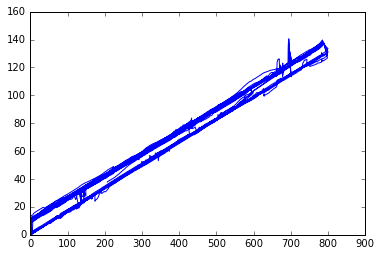

In [42]:
plt.plot(gpsdf.x, gpsdf.y)

Well I'll fill you in right now, this data comes from a few blocks of University Ave. in Berkeley.  Some are going westbound, some are eastbound...  I'm a bit surprised the GPS resolved the different sides of the road...

In [43]:
eastbound = gpsdf.groupby('segment').apply(lambda aa: aa.x.iloc[-1] - aa.x.iloc[0]) > 0
eastbound

segment
0     False
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8      True
9     False
10     True
11    False
12     True
13     True
14    False
15     True
16    False
17     True
18    False
19     True
20    False
21    False
dtype: bool

In [44]:
lmdfeast = lmdf.set_index('segment').ix[eastbound].reset_index()
gpsdfeast = gpsdf.set_index('segment').ix[eastbound].reset_index()

Ok, perhaps distance down the road would let us aggregate along chunks of distance here and look at the variability of natural radioactivity.

In [45]:
gpsdfeast['distance'] = np.sqrt(gpsdfeast.x**2 + gpsdfeast.y**2)

Joining and merging dataframes can be done like databases.  As always, loads of functionality here, but this is just one example.... 

In [46]:
lmjoined = lmdfeast.merge(gpsdfeast[['distance','timestamp']], left_on='timestamp', right_on='timestamp', how='outer')

In [47]:
lmjoined.head()

,segment,timestamp,detch,energy,distance
0,1,1.331670e+09,26,399.345154,NaN
1,1,1.331670e+09,29,101.067833,NaN
2,1,1.331670e+09,2,123.998184,NaN
3,1,1.331670e+09,3,223.163559,NaN
4,1,1.331670e+09,25,1221.298584,NaN


In [48]:
lmjoined.tail()

,segment,timestamp,detch,energy,distance
996027,NaN,1.335387e+09,NaN,NaN,601.182680
996028,NaN,1.335387e+09,NaN,NaN,602.352183
996029,NaN,1.335387e+09,NaN,NaN,603.495995
996030,NaN,1.335387e+09,NaN,NaN,604.646094
996031,NaN,1.335387e+09,NaN,NaN,605.753012


In [49]:
lmjoined = lmjoined.sort_values('timestamp').reset_index(drop=True)

In [50]:
lmjoined.head()

,segment,timestamp,detch,energy,distance
0,1,1.331670e+09,26,399.345154,NaN
1,1,1.331670e+09,29,101.067833,NaN
2,1,1.331670e+09,2,123.998184,NaN
3,1,1.331670e+09,3,223.163559,NaN
4,1,1.331670e+09,25,1221.298584,NaN


Forward and backward fill work as expected.  There are interpolation tools as well.  I'm not going to touch on timeseries stuff, but Pandas plays incredibly nicely with timeseries.

In [51]:
lmjoined.distance.ffill(inplace=True)
lmjoined.distance.bfill(inplace=True)

Drop the initial GPS coords because they don't correspond to gamma-ray interactions

In [52]:
lmjoined.dropna(inplace=True)
lmjoined.head()

,segment,timestamp,detch,energy,distance
0,1,1.331670e+09,26,399.345154,2.901917
1,1,1.331670e+09,29,101.067833,2.901917
2,1,1.331670e+09,2,123.998184,2.901917
3,1,1.331670e+09,3,223.163559,2.901917
4,1,1.331670e+09,25,1221.298584,2.901917


In [94]:
stepsize = 20
lmjoined['distchunk'] = (lmjoined.distance // stepsize).astype(int) * stepsize + stepsize/2

I like this trick of // division and casting as an integer to make a nice arbitrary unit value for grouping...

Another way is using pd.cut to label data.  

In [95]:
labeledges = np.arange(0,lmjoined.distance.max()+stepsize,stepsize)
labels = (labeledges[:-1] + labeledges[1:])/2
lmjoined['distchunk2'] = pd.cut(lmjoined.distance, labeledges, labels=labels, include_lowest=False)

In [96]:
lmjoined.head()

,segment,timestamp,detch,energy,distance,distchunk,distchunk2
0,1,1.331670e+09,26,399.345154,2.901917,10,10
1,1,1.331670e+09,29,101.067833,2.901917,10,10
2,1,1.331670e+09,2,123.998184,2.901917,10,10
3,1,1.331670e+09,3,223.163559,2.901917,10,10
4,1,1.331670e+09,25,1221.298584,2.901917,10,10


Ok, we should probably do some real work now.  Lets calculate the normalized (by time and detector number) spectra for each segment/distchunk combination.

In [97]:
segdistgroup = lmjoined.groupby(['segment','distchunk'])
histdata = segdistgroup.energy.apply(lambda x: 1. * np.histogram(x,bins=np.arange(0,3000,1))[0]).apply(pd.Series)
deltaT = segdistgroup.timestamp.max() - segdistgroup.timestamp.min()
numdetectors = segdistgroup.detch.apply(lambda x: len(x.unique()))

In [98]:
normhist = histdata.div(deltaT, level=[0,1], axis=0)
normhist = normhist.div(numdetectors, level=[0,1], axis=0)

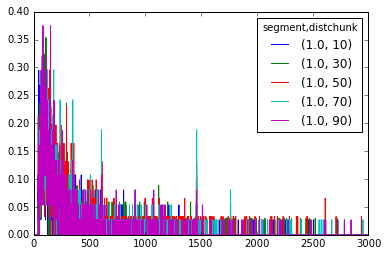

In [99]:
normhist.head().T.plot()

In [115]:
peakratesdict = {}
peakratesdict['k'] = normhist.loc[:,1460-3:1460+3].sum(axis=1)
peakratesdict['pos'] = normhist.loc[:,511-3:511+3].sum(axis=1)
peakratesdict['tl'] = normhist.loc[:,2614-3:2614+3].sum(axis=1)
peakratesdict['bi'] = normhist.loc[:,609-3:609+3].sum(axis=1)

peakrates = pd.DataFrame(peakratesdict)

In [116]:
peakrates.head()

bi         k       pos        tl
segment distchunk                                        
1       10         0.214508  0.348576  0.187695  0.053627
        30         0.294648  0.294648  0.088394  0.029465
        50         0.393644  0.393644  0.164018  0.098411
        70         0.403122  0.429997  0.241873  0.053750
        90         0.240926  0.321235  0.133848  0.053539

In [148]:
meanrates = peakrates.dropna().groupby(level=1).agg([np.mean,np.std])

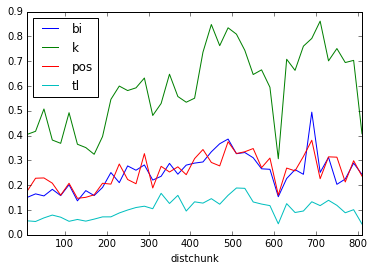

In [152]:
meanrates.xs('mean',level=1,axis=1).plot()

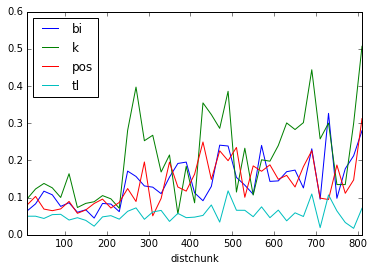

In [153]:
meanrates.xs('std',level=1,axis=1).plot()